
# Project: Investigate a Dataset - [TMDB Movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction
### Dataset Description

I chose **tmdb movies** dataset which contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters. The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time. there are 22 columns in total. 

## Questions for analysis

the dataset contains various features of different movies. however, I want to focus on popularity of the movies and how it's related with other attributes, in particular revenue, budget, runtime and release year. 
so I ask: 

**what is the relationship between popularity and revenue?**

this question answer whether popular movies return large revenue and whether there is any relationship between the popularity and the revenue of the movies.

**what is the relationship between popularity and budget?**

this question answer whether popular movies require large budgets. it's critical question to answer in order to inform how the budget infulence the popularity of the movies. these two question tells how to invest and how much to expect for movies.

**what is the relationship between popularity and runtime?**

this question answer the important question whether popular movies have long runtime. although not a part of this research this open another question if runtime affects investment return of popular movies.

**what is the relationship between popularity and release year?**

this question answer through time are more popular movies being made or not. and it raises another question sush as why it is not, if it isn't, and how is that happened, if it does. this can be answered in the future studies.  

my independent variables are revenue, budget, runtime and release year, where as the dependent variable is popularity.
I will attempt to answer this question first by stating whether the relationship is positive or negative. Then, I will answer the strenght of the relatioship as week or strong.

In [1]:
# Use this cell to set up import statements for all of the packages that you
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


## tmdb movies Data Wrangling

In this section the dataset will be loaded and assessed for its number of columns and rows, dtype and missing values of the column.
The dataset is assessed for any duplicate rows and number of unique values in each column.

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv("tmdb-movies.csv")

In [3]:
# checking the shape (number of rows and columns) of the dataframe
df.shape

(10866, 21)

In [4]:
# looking the details of each features (columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
# looking the top 5 rows of the datafram (table)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
# checking the number of unique values in each column
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [7]:
# checking the number of non null values in each column
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
# checking the number of similar rows in the dataframe
sum(df.duplicated())

1


### Data Cleaning

 

## TMDB movies date cleaning
after thorough assement of the data above. I decided to drope columns that aren't relevant to the research question. furthermore, some of the columns such as **production_companies**, **homepage**, **tagline** and **keywords** have so many **null values**. in addition, columns such as **cast** and **genres** have multiple values to determine the dependent variable where as columns such as **director** have few unique value to determine which one director determine the dependent variable. for this reasons I decided to drop these colunms and others that are not relevant to my research question. and I kept columns that are only relevant to research question. this include: popularity, revenue, budget, runtime and release year. likewise, I droped one duplicate row from the data frame 



In [9]:
# dropping columns that are not suitable for research question
df.drop(['homepage', 'tagline','original_title','keywords','director', 'production_companies','cast', 'genres'], axis = 1, inplace = True)


In [10]:
#dropping columns that are not relevant to research question 
df.drop(columns=['vote_count','vote_average','imdb_id','overview','release_date','id','budget_adj', 'revenue_adj'], inplace = True)
df.head()

,popularity,budget,revenue,runtime,release_year
0,32.985763,150000000,1513528810,124,2015
1,28.419936,150000000,378436354,120,2015
2,13.112507,110000000,295238201,119,2015
3,11.173104,200000000,2068178225,136,2015
4,9.335014,190000000,1506249360,137,2015


In [11]:
# dropping one duplicate row
df.drop_duplicates()

,popularity,budget,revenue,runtime,release_year
0,32.985763,150000000,1513528810,124,2015
1,28.419936,150000000,378436354,120,2015
2,13.112507,110000000,295238201,119,2015
3,11.173104,200000000,2068178225,136,2015
4,9.335014,190000000,1506249360,137,2015
5,9.110700,135000000,532950503,156,2015
6,8.654359,155000000,440603537,125,2015
7,7.667400,108000000,595380321,141,2015
8,7.404165,74000000,1156730962,91,2015
9,6.326804,175000000,853708609,94,2015


In [12]:
# checking the number of rows and columns of cleaned dataset
df.shape

(10866, 5)

In [13]:
# looking the details of the each column of the cleaned dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 5 columns):
popularity      10866 non-null float64
budget          10866 non-null int64
revenue         10866 non-null int64
runtime         10866 non-null int64
release_year    10866 non-null int64
dtypes: float64(1), int64(4)
memory usage: 424.5 KB


In [14]:
# checking the descriptive statistics of the cleaned dataset
df.describe()

,popularity,budget,revenue,runtime,release_year
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,2001.322658
std,1.000185,3.091321e+07,1.170035e+08,31.381405,12.812941
min,0.000065,0.000000e+00,0.000000e+00,0.000000,1960.000000
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,1995.000000
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,2006.000000
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,2015.000000


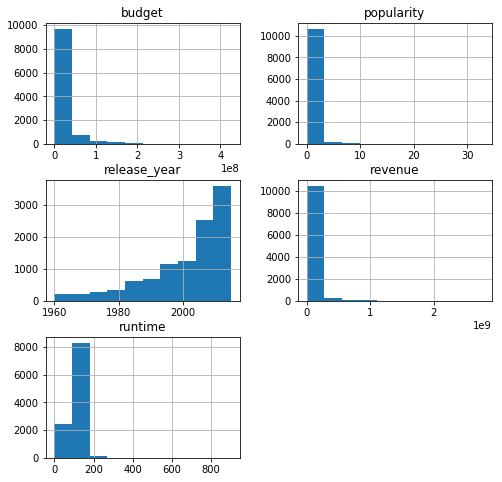

In [15]:
# histogram of the features of tmdb dataset
df.hist(figsize=(8,8));

In the histograms above, we can see that release year is skewed to the left as the number of movies released each year increases through time. otherwise, other features are concentrated in one area (it due to decimal representation of large numbers). 

In [16]:
# creating new column that categorize popularity into least, moderate and highly popular (using Min, 25%,75% and Max)
df['PopularityCategory']=pd.cut(df.popularity, 
                     bins = [0,0.207,0.713,33], 
                     labels = ['Least popular', 'Moderately popular','Highly popular']
                    )
df.head()

,popularity,budget,revenue,runtime,release_year,PopularityCategory
0,32.985763,150000000,1513528810,124,2015,Highly popular
1,28.419936,150000000,378436354,120,2015,Highly popular
2,13.112507,110000000,295238201,119,2015,Highly popular
3,11.173104,200000000,2068178225,136,2015,Highly popular
4,9.335014,190000000,1506249360,137,2015,Highly popular


In [17]:
#rename release_year column for ease of future calculations (got it from digitalocean.com) 
df = df.rename(columns = {'release_year':'ReleaseYear'})

In [18]:
#the details of the new dataset with new created column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 6 columns):
popularity            10866 non-null float64
budget                10866 non-null int64
revenue               10866 non-null int64
runtime               10866 non-null int64
ReleaseYear           10866 non-null int64
PopularityCategory    10866 non-null category
dtypes: category(1), float64(1), int64(4)
memory usage: 435.2 KB


In [19]:
# calculating the number of each categories of popular movies
df['PopularityCategory'].value_counts()

Moderately popular    5444
Highly popular        2720
Least popular         2702
Name: PopularityCategory, dtype: int64

In the above cell, we can see that the number of moderately popular movies are nearly twices of that of least and highly popular movies, where as the number of highly and least popular movies are fairly the same,

In [20]:
# grouping based on popularity and finding the mean of the revenue
df.groupby('PopularityCategory').revenue.mean()

PopularityCategory
Least popular         2.632399e+06
Moderately popular    1.146624e+07
Highly popular        1.335240e+08
Name: revenue, dtype: float64

In the above cell, we can see that there is huge gap of revenue among least, moderately and highly popular movies.

In [21]:
# grouping based on popularity and finding the mean of the budget
df.groupby('PopularityCategory').budget.mean()

PopularityCategory
Least popular         2.048698e+06
Moderately popular    7.737539e+06
Highly popular        4.090593e+07
Name: budget, dtype: float64

In the above cell, we can see that there is large diference of budget among least, moderately and highly popular movies.

In [22]:
# grouping based on popularity and finding the mean of the runtime
df.groupby('PopularityCategory').runtime.mean()

PopularityCategory
Least popular          97.378608
Moderately popular    101.243387
Highly popular        108.388235
Name: runtime, dtype: float64

In the above cell, we can see that there is not much diference of runtme among least, moderately and highly popular movies.

In [23]:
# grouping based on popularity and finding the mode of the release year (got it from statology.org)
df.groupby('PopularityCategory')['ReleaseYear'].agg(pd.Series.mode)

PopularityCategory
Least popular         2014
Moderately popular    2014
Highly popular        2015
Name: ReleaseYear, dtype: int64

In the above cell, we can see that most of least, moderately and highly popular movies are released around the same time.

In [24]:
# function that return the box graph of each columns
def draw_box(features):
    return df.boxplot(features)

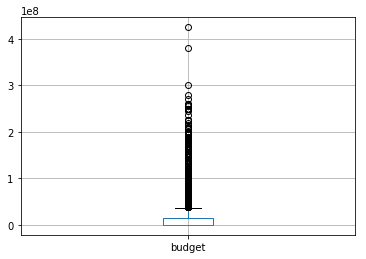

In [25]:

draw_box(['budget'])

In the above graph, we can see that there is large number of outliers in the budget of the movies

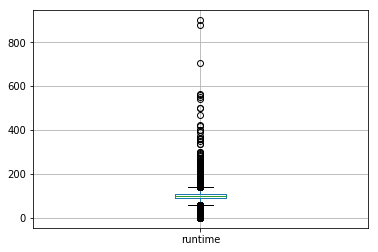

In [26]:
draw_box(['runtime'])

In the above graph, we can see that there is large number of outliers in the runtime of the movies

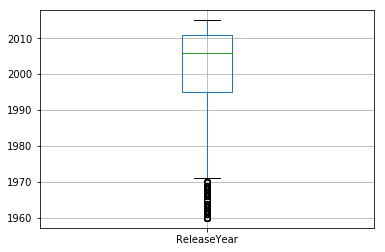

In [27]:
draw_box(['ReleaseYear'])

In the above graph, we can see that there is some amount of outliers to the earlier times of release years of the movies

<a id='eda'></a>
## Exploratory Data Analysis


## Exploratory Data Analysis of tmdb movies

The data is analyized to answer each research questions. statistical computation and visualization is used for data analysis.

## Research Question 1 (what is the relationship between popularity and revenue of the movies)
 

In the cell below, I will use scatter plot to visualize the relationship between popularity and revenue. if the points in the graph follow a straight diagonal line from left lower to right upper corner, then we can conclude that the two variables strongly and positively correlated. any thing away from the straight line but in the same direction shows the strenght of the correlation. however, if the points in the graph follow a straight line from left upper to right lower corner, then we can conclude that the two variables are strongly and negatively correlated. any deviation from the straight line in the same direction decrease the strength of the correlation.

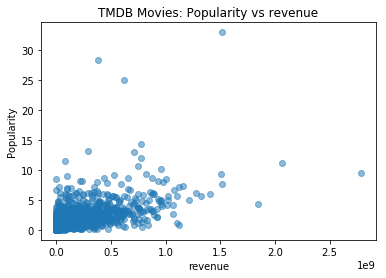

In [28]:
# inquiring the relationship using scatter plot

plt.scatter(x = df["revenue"], y=df["popularity"], alpha=0.5)
plt.xlabel('revenue')
plt.ylabel('Popularity')
plt.title('TMDB Movies: Popularity vs revenue');

The scatter plot above shows that there is some level of correlation between popularity and revenue. lets visualize that in the cell below using bar graph.

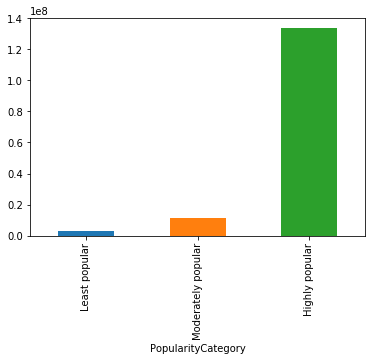

In [29]:
# using bar graph to visualize the revenue difference among least, moderately and highly popular movies 
df.groupby('PopularityCategory').revenue.mean().plot(kind='bar');

as estimated by scatter plot, the bar graph above shows the large difference of revenue among least, moderately and highly popular movies.

## Research Question 2  (what is the relationship between popularity and budget of the movies)

In the cell below, I will use scatter plot to visualize the relationship between popularity and budget. if the points in the graph follow a straight diagonal line from left lower to right upper corner, then we can conclude that the two variables strongly and positively correlated. any thing away from the straight line but in the same direction shows the strenght of the correlation. however, if the points in the graph follow a straight line from left upper to right lower corner, then we can conclude that the two variables are strongly and negatively correlated. any deviation from the straight line in the same direction decrease the strength of the correlation.

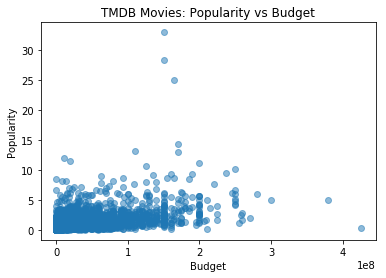

In [30]:
# inquiring the relationship using scatter plot

plt.scatter(x = df["budget"], y=df["popularity"], alpha=0.5)
plt.xlabel('Budget')
plt.ylabel('Popularity')
plt.title('TMDB Movies: Popularity vs Budget');

The scatter plot above shows that there is some level of correlation between popularity and budget. lets visualize that in the cell below using bar graph.

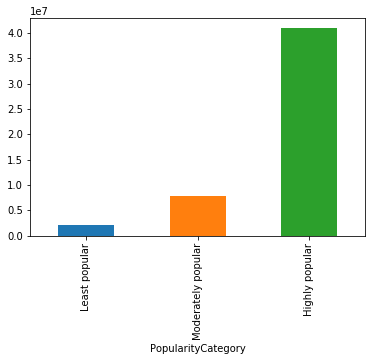

In [31]:
# using bar graph to visualize the budget difference among least, moderately and highly popular movies 
df.groupby('PopularityCategory').budget.mean().plot(kind='bar');

as estimated by scatter plot, the bar graph above shows the large difference of budget among least, moderately and highly popular movies.

## Research Question 3 (what is the relationship between popularity and runtime of the movies)

In the cell below, I will use scatter plot to visualize the relationship between popularity and runtime. if the points in the graph follow a straight diagonal line from left lower to right upper corner, then we can conclude that the two variables strongly and positively correlated. any thing away from the straight line but in the same direction shows the strenght of the correlation. however, if the points in the graph follow a straight line from left upper to right lower corner, then we can conclude that the two variables are strongly and negatively correlated. any deviation from the straight line in the same direction decrease the strength of the correlation.

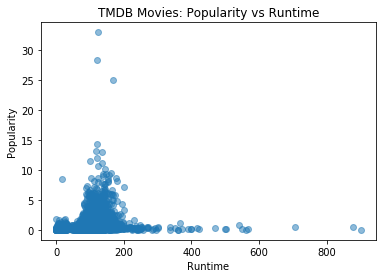

In [32]:
# inquiring the relationship using scatter plot

plt.scatter(x = df["runtime"], y=df["popularity"], alpha=0.5)
plt.xlabel('Runtime')
plt.ylabel('Popularity')
plt.title('TMDB Movies: Popularity vs Runtime');

The scatter plot above shows that there is no correlation between popularity and runtime of the movies. lets visualize that in the cell below using bar graph.

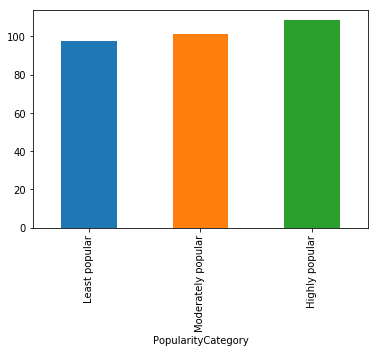

In [33]:
# using bar graph to visualize the runtime difference among least, moderately and highly popular movies 
df.groupby('PopularityCategory').runtime.mean().plot(kind='bar');

as estimated by scatter plot, the bar graph above shows there is no difference of runtime among least, moderately and highly popular movies.

## Research Question 4 (what is the relationship between pupolarity and release year of the movies)

In the cell below, I will use scatter plot to visualize the relationship between popularity and release year. if the points in the graph follow a straight diagonal line from left lower to right upper corner, then we can conclude that the two variables strongly and positively correlated. any thing away from the straight line but in the same direction shows the strenght of the correlation. however, if the points in the graph follow a straight line from left upper to right lower corner, then we can conclude that the two variables are strongly and negatively correlated. any deviation from the straight line in the same direction decrease the strength of the correlation.

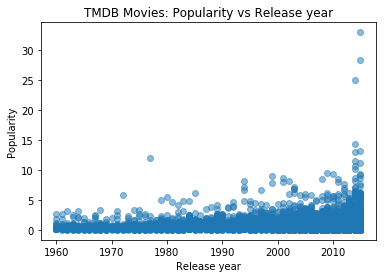

In [34]:
# inquiring the relationship using scatter plot

plt.scatter(x = df["ReleaseYear"], y=df["popularity"], alpha=0.5)
plt.xlabel('Release year')
plt.ylabel('Popularity')
plt.title('TMDB Movies: Popularity vs Release year');

The scatter plot above shows that there is no correlation between popularity and release year of the movies. although there are more movies made each year, the number of popular movies stayed the saem. lets visualize that in the cell below using bar graph.

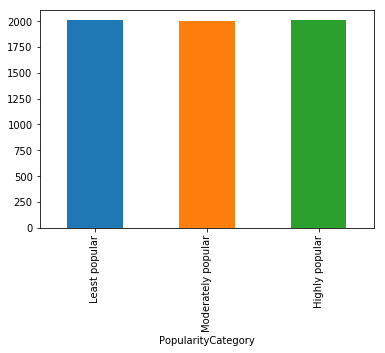

In [35]:
# using bar graph to visualize the rrelease year difference among least, moderately and highly popular movies 
df.groupby('PopularityCategory').ReleaseYear.median().plot(kind='bar');

as estimated by scatter plot, the bar graph above shows there is no difference of release year among least, moderately and highly popular movies.

## testing correlation of the dependent variable against the independent variable using statistical computation
**I learn this code during my study in worldquant univeristy** actually I wrote the code myself in the course for assignemnt.

In the cell below I calculate the correlation between the dependent and the independent varaibles numerically. the results will range between 1 and -1, including zero. if we get a result close to 1, then the variables have strong positive correlation and closer to zero suggest weak correlation, where as if we get a result close -1, then the variables have strong negative correlation, and closer to zero indicates week correlation. a zero result implies that there is no correlation between the variables.


In [36]:
# checking correlations between different independent variables and dependent variable (code that I wrote for assignemnt in worldquant University)
correlations = {'popularity vs Revenue' : df['popularity'].corr(df['revenue']),
               'popularity vs Budget' : df['popularity'].corr(df['budget']),
                'popularity vs Runtime' : df['popularity'].corr(df['runtime']),
                'popularity vs Release Year' : df['popularity'].corr(df['ReleaseYear'])       
               } 
correlations

{'popularity vs Revenue': 0.66335836645173829,
 'popularity vs Budget': 0.54547223155018798,
 'popularity vs Runtime': 0.1390325748088202,
 'popularity vs Release Year': 0.089800527858540799}

In the above cell, we get that revenue with 0.6 and budget with 0.5 have some strong correlation with the popularity. whereas, runtime with 0.1 and release year with 0.08 have weak correlation with the popularity of the movies.

### Conclusions
 The inquiry shows that **revenue and budget** is positively and relatively strongly correlated with popularity of the movie. as the scatter plot shows relative increment of the revenue and budget with increasing of the popularity. likewise, the correlation shows that revenue and budget have high correlation values. furhter studies is recommended to sort out other factors such as Lead actors and acteress, advertasiment, genre and the story which affect both the revenue and popularity. The same is true for the budget. 
whereas, **runtime and release year** has positive and relatively weak correlation with the popularity of the movie. as seen in scatter plot the runtime didn't follow the trend of popularity, instead besides small rise the runtime remain the same as popularity increases. The same is true for the release year. although the number of movies released steadily increased over the years, the number of highly popular movies released each year remained the same. 

**Limitations**

The research was done using dataset that contains entirely continuous values. this limited the ability of performing various types of visualization which requires categorical values. in addition, there are several confounding factors that isn't considered in this research. future studies will consider this factors to find out the price relationship.

In [37]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0